In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [2]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5)) # antes era 0.25

model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 28)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4732)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               605824    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model.fit(x=x_train,y=y_train, epochs=10)

Using TensorFlow backend.


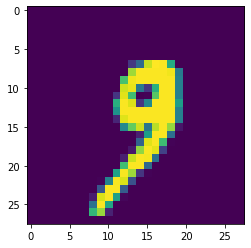

(1, 28, 28, 1)
(1, 26, 26, 28)
(1, 13, 13, 28)


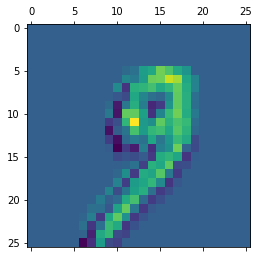

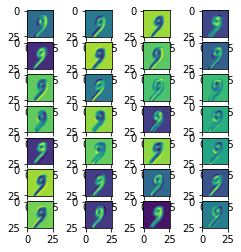

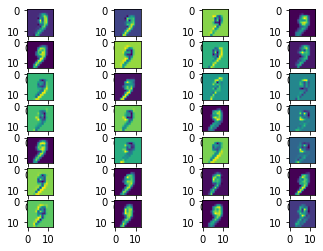

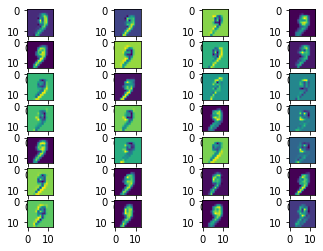

In [6]:
from keras.preprocessing import image
import numpy as np

img_tensor = image.img_to_array(x_test[1000])
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)

layer_outputs = [layer.output for layer in model.layers[:7]]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs) 
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]
print(first_layer_activation.shape)
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')
second_layer_activation = activations[1]
print(second_layer_activation.shape)
plt.matshow(second_layer_activation[0, :, :, 11], cmap='viridis')

for i in range(28):
    plt.subplot(7,4,i+1)    # the number of images in the grid is 7*4 (28)
    plt.imshow(activations[0][0, :, :, i], cmap='viridis')

plt.show()

for i in range(28):
    plt.subplot(7,4,i+1)    # the number of images in the grid is 7*4 (28)
    plt.imshow(activations[1][0, :, :, i], cmap='viridis')

plt.show()

for i in range(28):
    plt.subplot(7,4,i+1)    # the number of images in the grid is 7*4 (28)
    plt.imshow(activations[2][0, :, :, i], cmap='viridis')

plt.show()

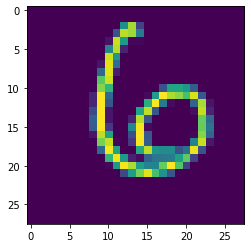

(1, 28, 28, 1)
(1, 26, 26, 28)
(1, 13, 13, 28)


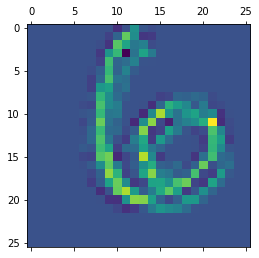

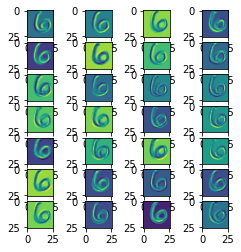

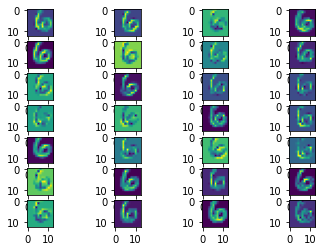

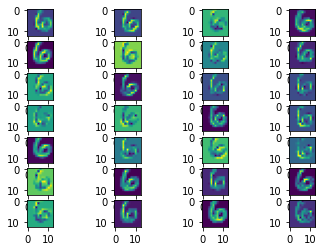

In [7]:
from keras.preprocessing import image
import numpy as np

img_tensor = image.img_to_array(x_test[100])
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)

layer_outputs = [layer.output for layer in model.layers[:7]]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs) 
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]
print(first_layer_activation.shape)
plt.matshow(first_layer_activation[0, :, :, 14], cmap='viridis')
second_layer_activation = activations[1]
print(second_layer_activation.shape)
plt.matshow(second_layer_activation[0, :, :, 10], cmap='viridis')

for i in range(28):
    plt.subplot(7,4,i+1)    # the number of images in the grid is 7*4 (28)
    plt.imshow(activations[0][0, :, :, i], cmap='viridis')

plt.show()

for i in range(28):
    plt.subplot(7,4,i+1)    # the number of images in the grid is 7*4 (28)
    plt.imshow(activations[1][0, :, :, i], cmap='viridis')

plt.show()

for i in range(28):
    plt.subplot(7,4,i+1)    # the number of images in the grid is 7*4 (28)
    plt.imshow(activations[2][0, :, :, i], cmap='viridis')

plt.show()

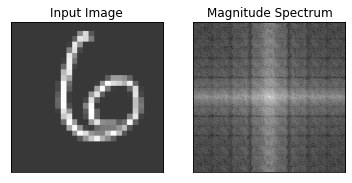

In [8]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('six.png',0)

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

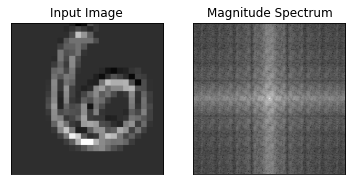

In [9]:
img = cv2.imread('six2.png',0)

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

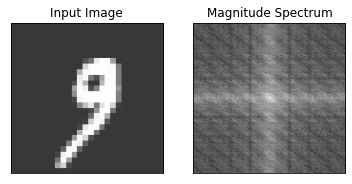

In [10]:
img = cv2.imread('nine.png',0)

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

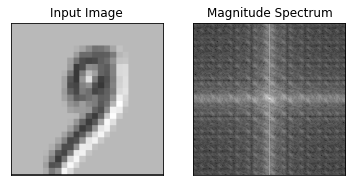

In [11]:
img = cv2.imread('nine2.png',0)

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

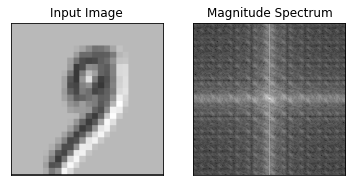

In [12]:
def plot_dft(image):
    img = cv2.imread(image,0)
    dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
    plt.subplot(121),plt.imshow(img, cmap = 'gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
    plt.show()
    
plot_dft('nine2.png')

IndexError: index 1 is out of bounds for axis 2 with size 1

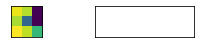

In [18]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

layer_name = 'conv2d'
filter_index = 0 # Which filter in this block would you like to visualise?

# Grab the filters and biases for that layer
filters, biases = layer_dict[layer_name].get_weights()

# Normalize filter values to a range of 0 to 1 so we can visualize them
f_min, f_max = np.amin(filters), np.amax(filters)
filters = (filters - f_min) / (f_max - f_min)

# Plot first few filters
n_filters, index = 6, 1
for i in range(n_filters):
    f = filters[:, :, :, i]
    
    # Plot each channel separately
    for j in range(3):

        ax = plt.subplot(n_filters, 3, index)
        ax.set_xticks([])
        ax.set_yticks([])
        
        plt.imshow(f[:, :, j], cmap='viridis')
        index += 1
        
plt.show()

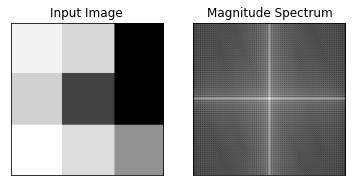

In [20]:
plt.imshow(f[:, :], cmap='viridis')
plot_dft('filter1.png')

In [9]:
layer_names = []
for layer in model.layers[:6]:
    layer_names.append(layer.name)

print(layer_names)
images_per_row = 14

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    print("size is", size)
    n_cols = n_features // images_per_row
    print("n_cols=",n_cols," images per row=", images_per_row," n_features=",n_features)
    print(size * n_cols, images_per_row * size)
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :,col * images_per_row + row]
            #channel_image -= channel_image.mean()
            #channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,row * size : (row + 1) * size] = channel_image

scale = 1. / size
plt.figure(figsize=(scale * display_grid.shape[1],scale * display_grid.shape[0]))
plt.title(layer_name)
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap='viridis')

['conv2d', 'max_pooling2d', 'dropout', 'flatten', 'dense', 'dropout_1']
size is 26
n_cols= 2  images per row= 14  n_features= 28
52 364
size is 13
n_cols= 2  images per row= 14  n_features= 28
26 182
size is 13
n_cols= 2  images per row= 14  n_features= 28
26 182
size is 4732
n_cols= 338  images per row= 14  n_features= 4732
1599416 66248


MemoryError: Unable to allocate 789. GiB for an array with shape (1599416, 66248) and data type float64

3


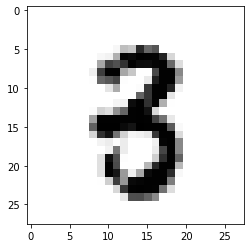

In [7]:
image_index = 2853
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
predict = x_test[image_index].reshape(28,28)
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())